In [ ]:
import numpy as np # For linear algebra operations
import pandas as pd # For data processing

In [ ]:
df= pd.read_excel('/content/f.xlsx') #loading CVS file to data frame

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1386,1967,Graduation,Together,32474,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
1,1991,1967,Graduation,Together,44931,0,1,2014-01-18,0,78,...,3,5,0,0,0,0,0,0,0,SP
2,10175,1958,PhD,Divorced,32173,0,1,2013-08-01,0,18,...,3,4,0,0,0,0,0,0,0,SP
3,2795,1958,Master,Single,30523,2,1,2013-07-01,0,5,...,2,7,0,0,0,0,0,0,0,CA
4,5824,1972,PhD,Together,34578,2,1,2014-04-11,1,7,...,2,6,0,0,0,0,0,0,0,AUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10854,1970,PhD,Married,38853,1,1,2014-05-23,90,29,...,3,7,0,0,0,0,0,0,0,IND
2236,8953,1965,Master,Single,35791,2,1,2013-05-06,94,27,...,3,8,0,0,0,0,0,0,0,SP
2237,10258,1965,Master,Single,35791,2,1,2013-05-06,94,27,...,3,8,0,0,0,0,0,0,0,US
2238,3336,1948,PhD,Together,66375,0,1,2013-11-21,96,712,...,5,7,1,0,0,0,0,0,0,AUS


In [ ]:
import datetime
df['Dt_Customer'] = df['Dt_Customer'].apply(lambda x: x.strftime('%m/%d/%y') if isinstance(x, datetime.datetime) else x)

0       05/11/14
1        1/18/14
2       08/01/13
3       07/01/13
4       04/11/14
          ...   
2235     5/23/14
2236    05/06/13
2237    05/06/13
2238    11/21/13
2239     5/28/14
Name: Dt_Customer, Length: 2240, dtype: object

In [ ]:
df['Income'] = df['Income'].str.replace('$', '')

# Convert the 'Income' column to integers
df['Income'] = df['Income'].str.replace(',', '').str.strip().astype(float).astype(int)
# Calculate the mean value of the 'Income' column, excluding zeros
mean_income = df.loc[df['Income'] != 0, 'Income'].mean()

# Replace 0 values with the calculated mean value
df['Income'] = df['Income'].replace(0, int(mean_income))
df.to_csv('/content/f.csv',index=False)


In [ ]:
import re

# Custom function to convert date format
def convert_date_format(date_str):
    # Check if the date is in the format m/dd/yy
    if re.match(r'^\d/\d{2}/\d{2}$', date_str):
        # Add a leading zero to the month
        return '0' + date_str
    return date_str

# Apply the custom function to the Dt_Customer column
df['Dt_Customer'] = df['Dt_Customer'].apply(convert_date_format)

0       05/11/14
1       01/18/14
2       08/01/13
3       07/01/13
4       04/11/14
          ...   
2235    05/23/14
2236    05/06/13
2237    05/06/13
2238    11/21/13
2239    05/28/14
Name: Dt_Customer, Length: 2240, dtype: object

In [ ]:
print(df['Income'])

0       84835
1       57091
2       67267
3       32474
4       21474
        ...  
2235    66476
2236    31056
2237    46310
2238    65819
2239    94871
Name: Income, Length: 2240, dtype: int64


In [ ]:
type(df['Dt_Customer'])

pandas.core.series.Series

In [ ]:
from datetime import datetime

# Assuming 'data' is a pandas DataFrame containing the 'Dt_Customer' column
def convert_date_format(data):
    # Define a function to convert each date
    def convert_date(date_str):
        # Try different date formats until the correct one is found
        for fmt in ("%m/%d/%y", "%m/%d/%Y", "%m/%d/%y", "%m/%d/%Y"):
            try:
                # Parse the date
                dt = datetime.strptime(date_str, fmt)
                # Return the date in the desired format
                return dt.strftime("%m/%d/20%y")
            except ValueError:
                continue
        # Return the original date string if no format matches
        return date_str

    # Apply the conversion function to the 'Dt_Customer' column
    df['Dt_Customer'].unique() = df['Dt_Customer'].apply(convert_date)
    return data

# Example usage:
# Load your dataset into a pandas DataFrame
# data = pd.read_csv('your_file.csv')
# Convert the date format
# data = convert_date_format(data)

SyntaxError: cannot assign to function call here. Maybe you meant '==' instead of '='? (<ipython-input-29-27c62673e404>, line 20)

In [ ]:
df['Dt_Customer'].unique()

<DatetimeArray>
['2014-05-11 00:00:00', '2014-01-18 00:00:00', '2013-08-01 00:00:00',
 '2013-07-01 00:00:00', '2014-04-11 00:00:00', '2014-05-12 00:00:00',
 '2014-03-04 00:00:00', '2013-11-15 00:00:00', '2013-07-30 00:00:00',
 '2014-03-10 00:00:00',
 ...
 '2012-10-07 00:00:00', '2014-01-09 00:00:00', '2012-10-21 00:00:00',
 '2013-08-14 00:00:00', '2014-05-09 00:00:00', '2013-04-12 00:00:00',
 '2014-05-15 00:00:00', '2014-04-12 00:00:00', '2014-03-22 00:00:00',
 '2012-10-09 00:00:00']
Length: 663, dtype: datetime64[ns]

In [ ]:
import datetime

# Assuming df is your DataFrame and 'Df_customer' is the column of interest
for i, row in df.iterrows():
    # Check if the value is a datetime.datetime instance
    if isinstance(row['Dt_Customer'], datetime.datetime):
        # Convert to desired string format
        df.at[i, 'Dt_Customer'] = row['Dt_Customer'].strftime('%m/%d/%y')

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y')

# Format the dates to 'mm/dd/20yy'
df['Dt_Customer'] = df['Dt_Customer'].dt.strftime('%m/%d/20%y')



AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   int64         
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

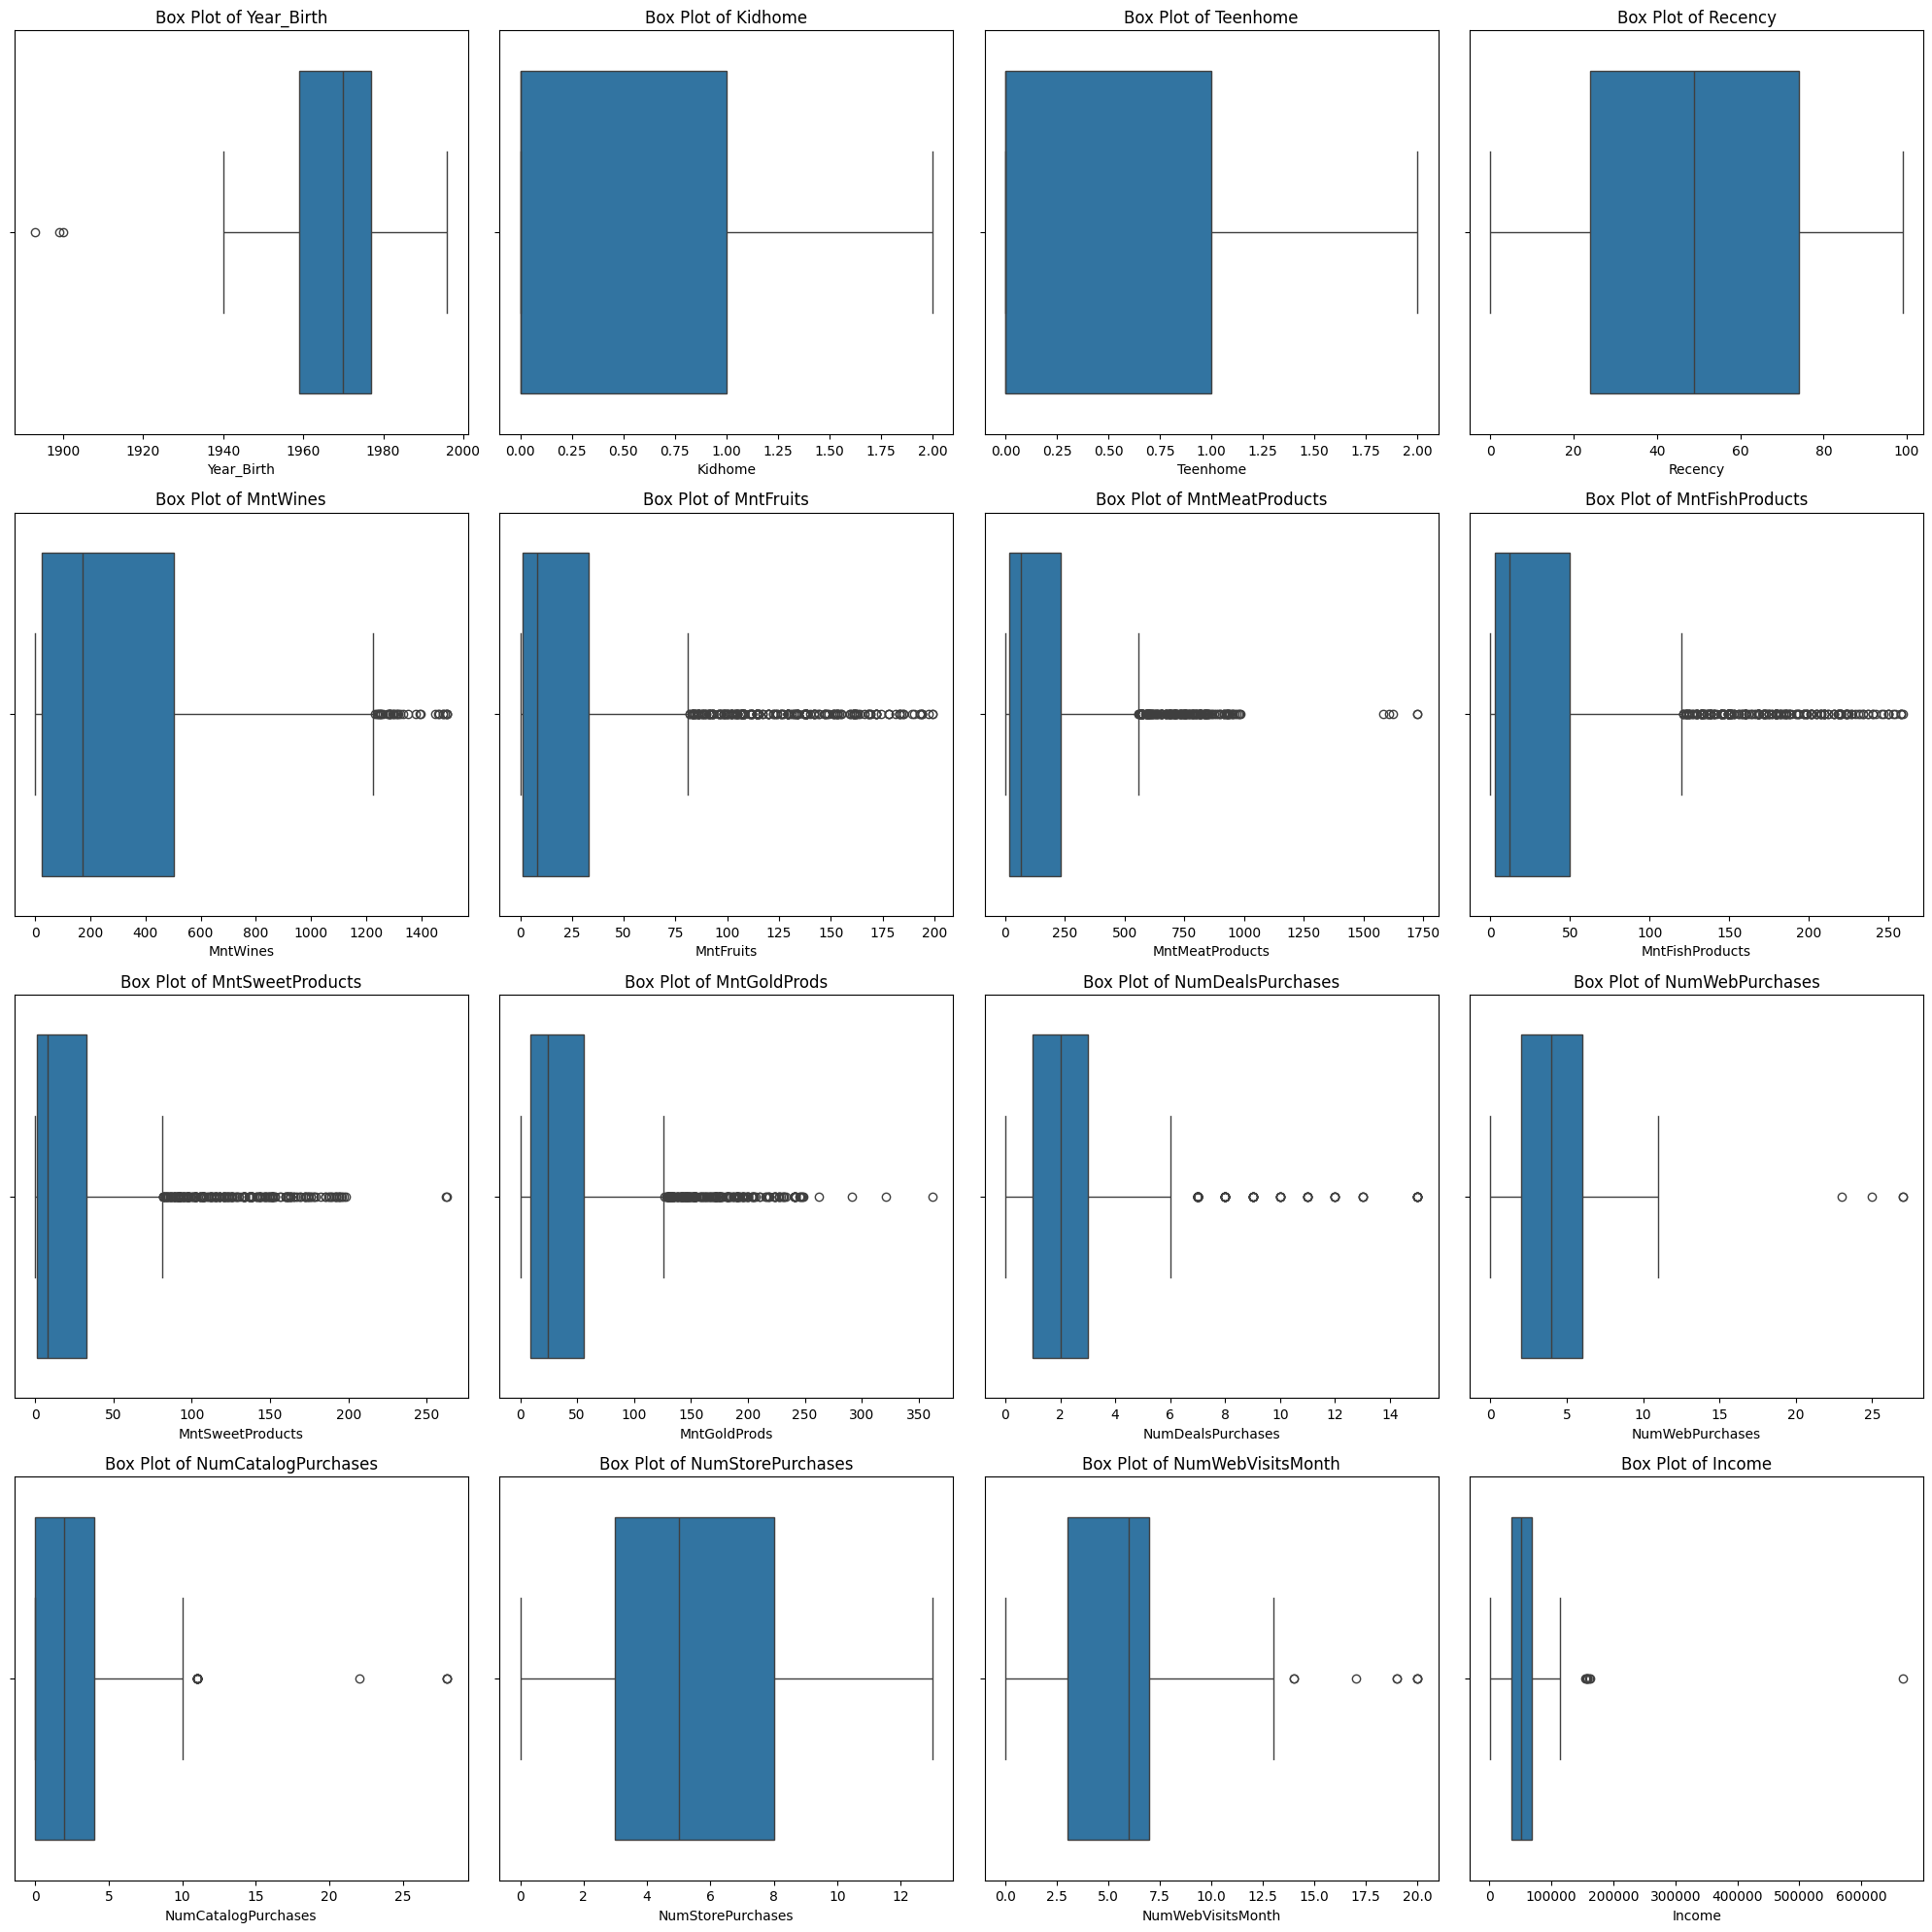

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
numeric_columns = ['Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
                   'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                   'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                   'NumStorePurchases', 'NumWebVisitsMonth', 'Income']

# Determine the number of rows/columns for the subplot grid
num_plots = len(numeric_columns)
num_columns = 4  # You can adjust this number based on your display preference
num_rows = num_plots // num_columns + (num_plots % num_columns > 0)

# Create subplots in a grid
plt.figure(figsize=(20, num_rows * 5))  # Adjust the figure size as needed
for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, num_columns, i+1)
    sns.boxplot(x=column, data=df)
    plt.title(f'Box Plot of {column}')
    plt.tight_layout()

plt.show()


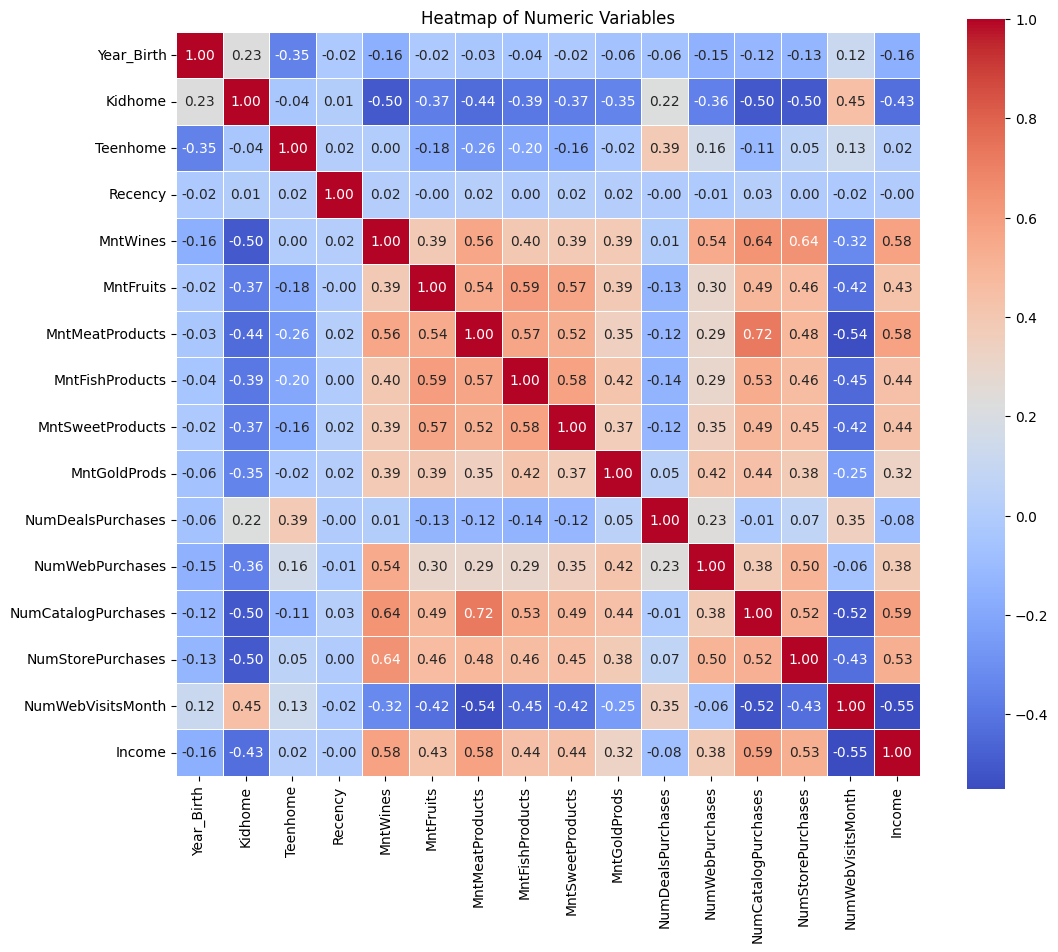

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
numeric_columns = ['Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
                   'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                   'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                   'NumStorePurchases', 'NumWebVisitsMonth', 'Income']

# Create a correlation matrix
corr_matrix = df[numeric_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

# Add title
plt.title('Heatmap of Numeric Variables')

# Show plot
plt.show()



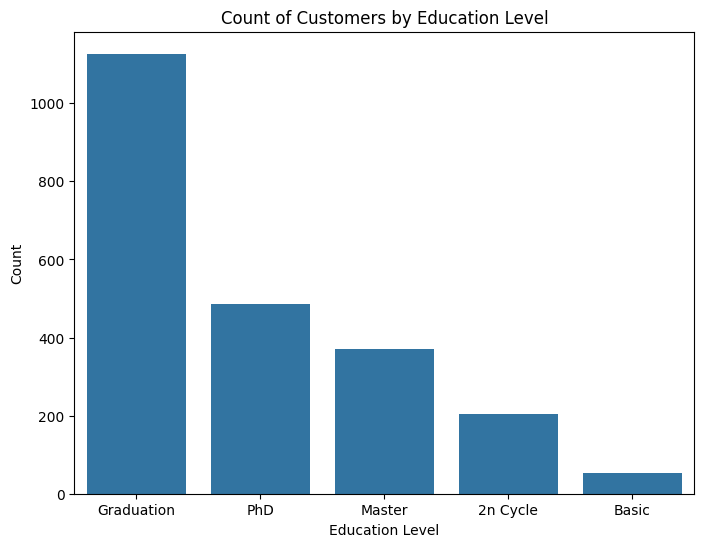

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', data=df)
plt.title('Count of Customers by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

TypeError: float() argument must be a string or a real number, not 'Period'

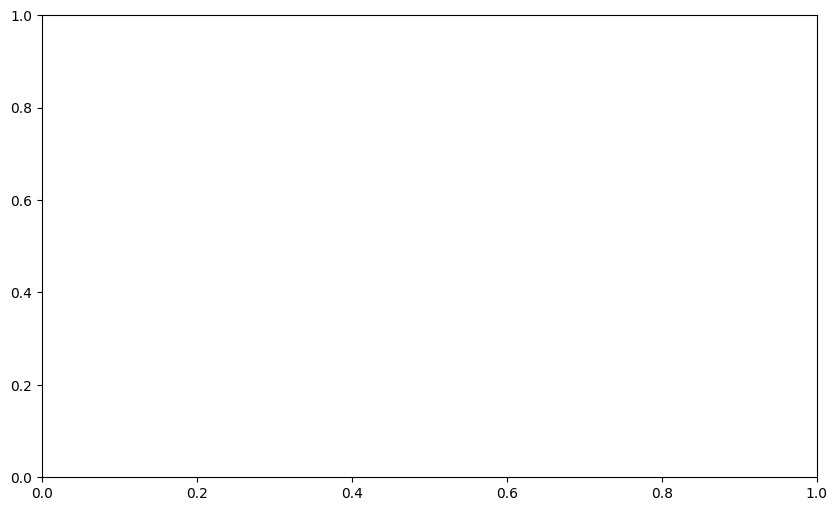

In [ ]:
# Convert 'Dt_Customer' to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Group by month and count registrations
monthly_registrations = df.groupby(df['Dt_Customer'].dt.to_period('M')).size()

plt.figure(figsize=(10, 6))
plt.plot(monthly_registrations.index, monthly_registrations.values, marker='o')
plt.title('Monthly Customer Registrations')
plt.xlabel('Month')
plt.ylabel('Registrations')
plt.xticks(rotation=45)
plt.show()


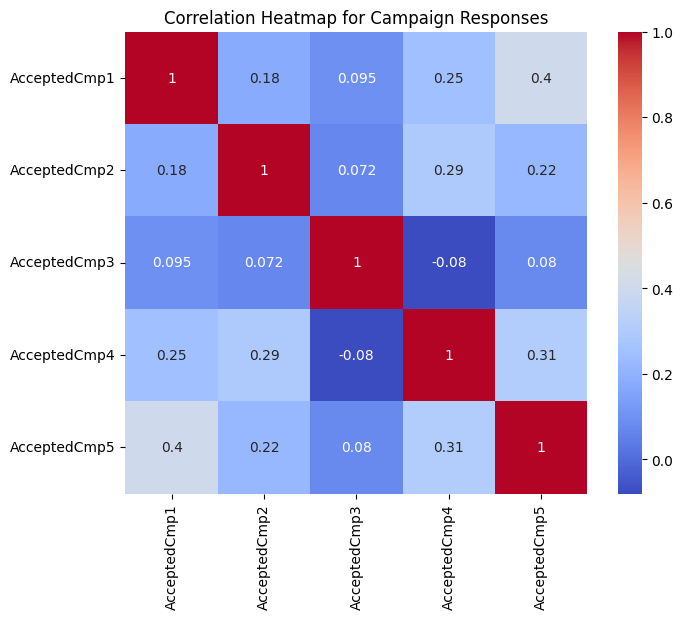

In [ ]:
# Assuming you have a subset of relevant columns
corr_matrix = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap for Campaign Responses')
plt.show()


In [ ]:
channel_counts = df['Preferred_Channel'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Preferred Marketing Channels')
plt.show()


KeyError: 'Preferred_Channel'

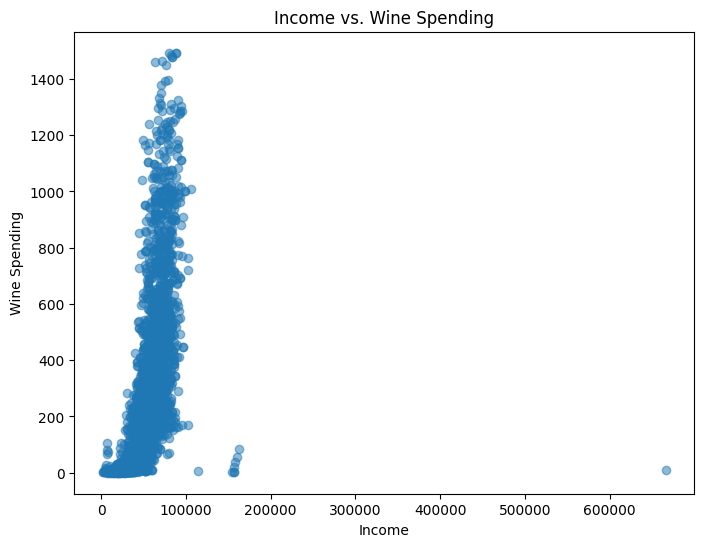

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Income'], df['MntWines'], alpha=0.5)
plt.title('Income vs. Wine Spending')
plt.xlabel('Income')
plt.ylabel('Wine Spending')
plt.show()


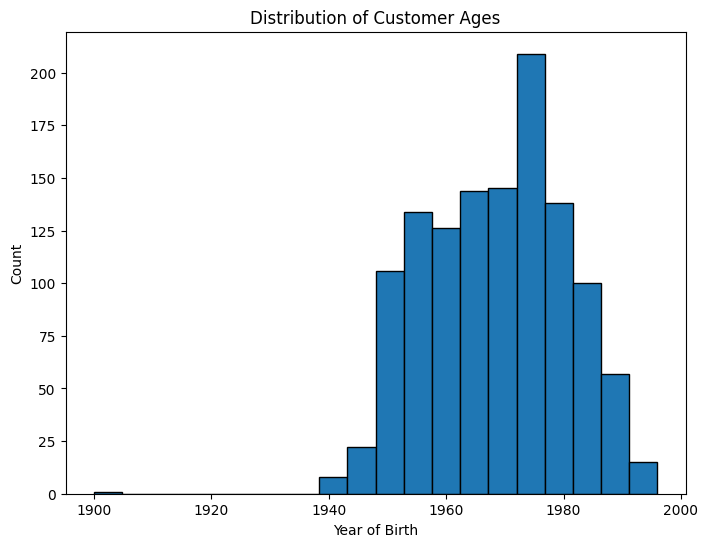

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['Year_Birth'], bins=20, edgecolor='black')
plt.title('Distribution of Customer Ages')
plt.xlabel('Year of Birth')
plt.ylabel('Count')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

#  'df' is your DataFrame and 'Date_Column' is a datetime column
df['Date_Column'] = pd.to_datetime(df['Date_Column'])
df.set_index('Date_Column', inplace=True)
df['Recency'].plot()
plt.title('Recency Over Time')
plt.xlabel('Date')
plt.ylabel('Recency')
plt.show()


KeyError: 'Date_Column'

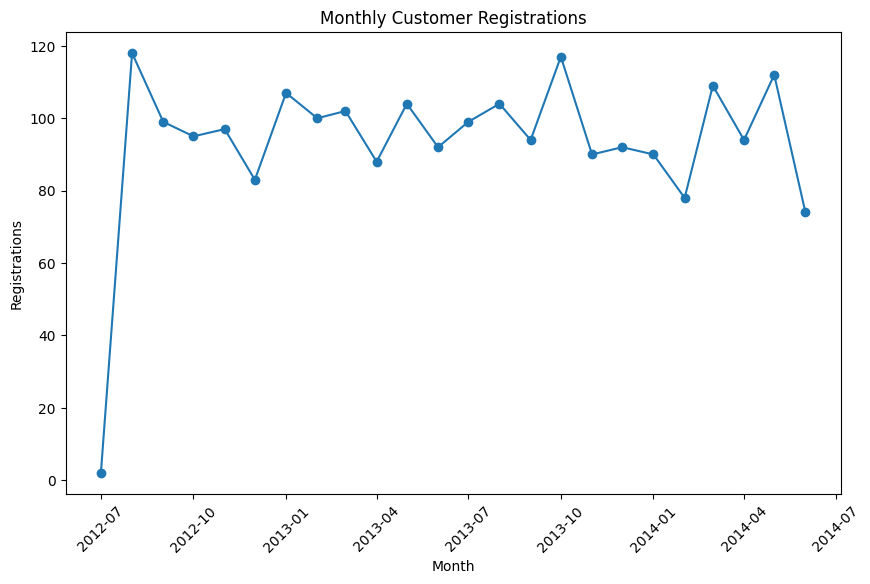

In [ ]:
import matplotlib.pyplot as plt

# Convert the 'Period' index to datetime
monthly_registrations.index = monthly_registrations.index.to_timestamp()

plt.figure(figsize=(10, 6))
plt.plot(monthly_registrations.index, monthly_registrations.values, marker='o')
plt.title('Monthly Customer Registrations')
plt.xlabel('Month')
plt.ylabel('Registrations')
plt.xticks(rotation=45)
plt.show()


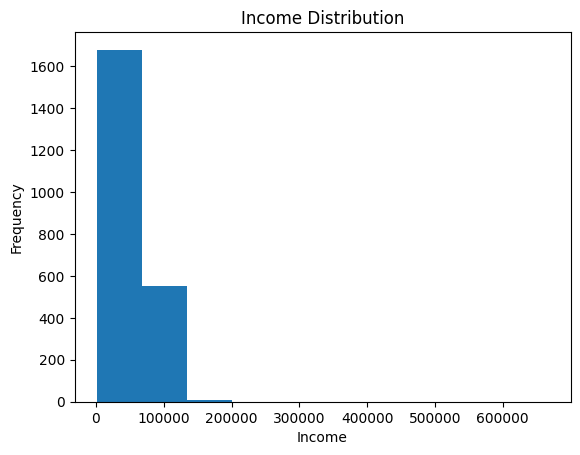

In [ ]:
plt.hist(df['Income'], bins=10)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


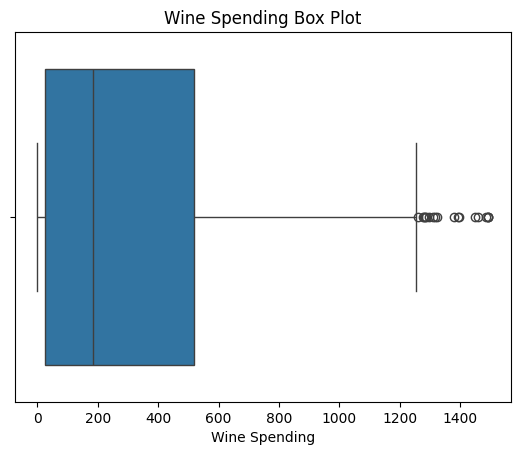

In [ ]:
sns.boxplot(x='MntWines', data=df)
plt.title('Wine Spending Box Plot')
plt.xlabel('Wine Spending')
plt.show()

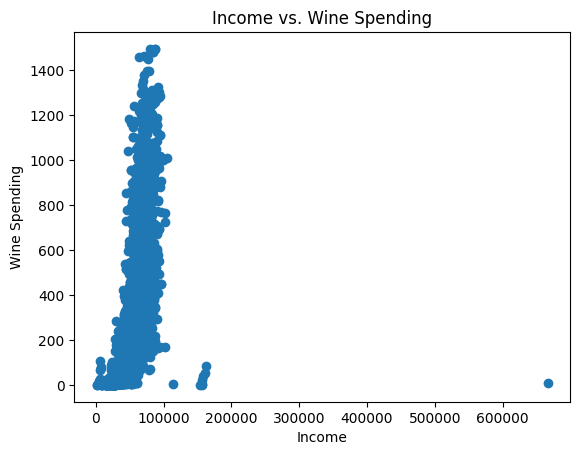

In [ ]:
plt.scatter(df['Income'], df['MntWines'])
plt.title('Income vs. Wine Spending')
plt.xlabel('Income')
plt.ylabel('Wine Spending')
plt.show()

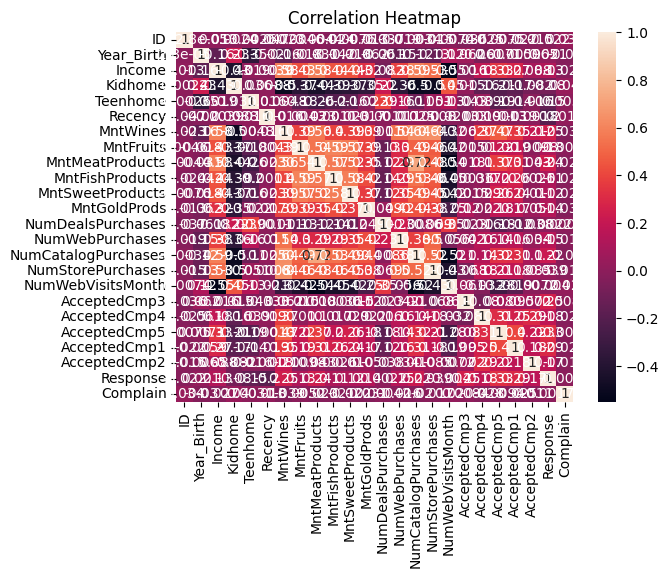

In [ ]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()
